# Study Iris Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Iris Data

In [2]:
# iris (붓꽃 데이터)
iris = pd.read_csv('D:\sglee\data\open_data\iris.csv', header=0) # header=0 means the first row of data. If no header, header=None.

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.columns # 'sepal_length', 'sepal_width', 'petal_length', 'petal_width','species' (꽃받침 길이, 폭, 꽃잎 길이, 폭, 품종)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [28]:
iris['species'].unique() # 품종의 종류 확인

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [29]:
iris.groupby(['species']).mean() # 품종별 통계 데이터

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


## Plots

### matplotlib을 사용한 Scatter Plot 그리기

Text(0, 0.5, 'sepal_width')

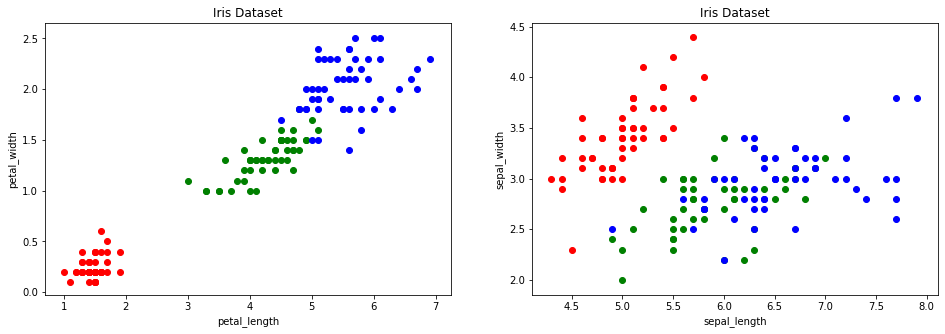

In [10]:
# Scatter Plot

fig, axes = plt.subplots(1,2,figsize=(16,5)) # subplots로 행=1, 열=2의 빈 그래프를 생성하여, fig와 axes로 반환한다
colors = {'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'} # 품종 마다 Marker의 색을 다르게 하기 위해 dictionary 데이터 생성

for i in range(len(iris)):
    axes[0].scatter(iris['petal_length'][i], iris['petal_width'][i], color=colors[iris['species'][i]])
    axes[1].scatter(iris['sepal_length'][i], iris['sepal_width'][i], color=colors[iris['species'][i]])
    
axes[0].set_title('Iris Dataset')
axes[0].set_xlabel('petal_length')
axes[0].set_ylabel('petal_width')
axes[1].set_title('Iris Dataset')
axes[1].set_xlabel('sepal_length')
axes[1].set_ylabel('sepal_width')

### matplotlib을 사용한 Line Plot 그리기

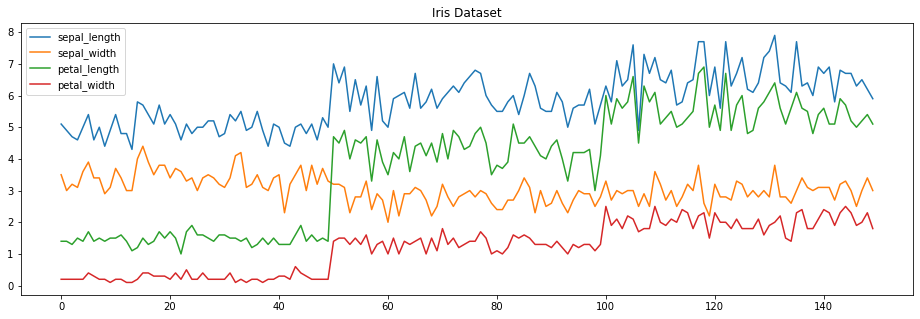

In [14]:
# Line Plot

columns = iris.columns.drop(['species'])
x_data = range(0, iris.shape[0])
fig, ax = plt.subplots(figsize=(16,5))

for column in columns:
    ax.plot(x_data, iris[column], label=column)
    
ax.set_title('Iris Dataset')
ax.legend()

### seaborn을 사용한 Histogram 그리기

In [11]:
import seaborn as sns #Visulization

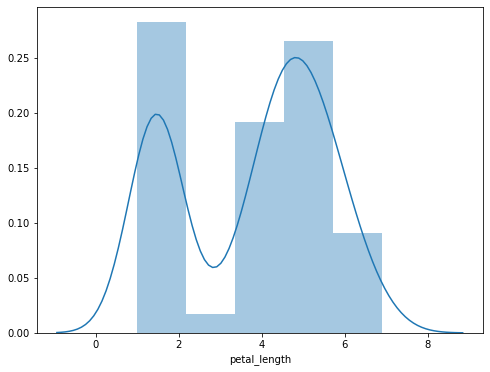

In [12]:
#histogram
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(iris['petal_length'])

## PCA

### 공분산 행렬을 이용한 PCA

In [16]:
iris_cov = iris.cov()

In [17]:
w, v = np.linalg.eig(iris_cov)

In [18]:
w, v

(array([ 4.22484077,  0.24224357,  0.07852391,  0.02368303]),
 array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
        [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
        [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
        [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]]))

### sklearn을 이용한 PCA

In [19]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=4)
pca.fit(iris.iloc[:,:-1])

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
print('singular value :', pca.singular_values_)
print('singular vector :\n', pca.components_.T)

singular value : [ 25.08986398   6.00785254   3.42053538   1.87850234]
singular vector :
 [[ 0.36158968  0.65653988 -0.58099728  0.31725455]
 [-0.08226889  0.72971237  0.59641809 -0.32409435]
 [ 0.85657211 -0.1757674   0.07252408 -0.47971899]
 [ 0.35884393 -0.07470647  0.54906091  0.75112056]]


In [26]:
pca.components_[0]

array([ 0.36158968, -0.08226889,  0.85657211,  0.35884393])

In [27]:
iris['PC1'] = iris.iloc[:,:4].dot(pca.components_[0])

In [30]:
iris['PC2'] = iris.iloc[:,:4].dot(pca.components_[1])

Text(0, 0.5, 'PC2')

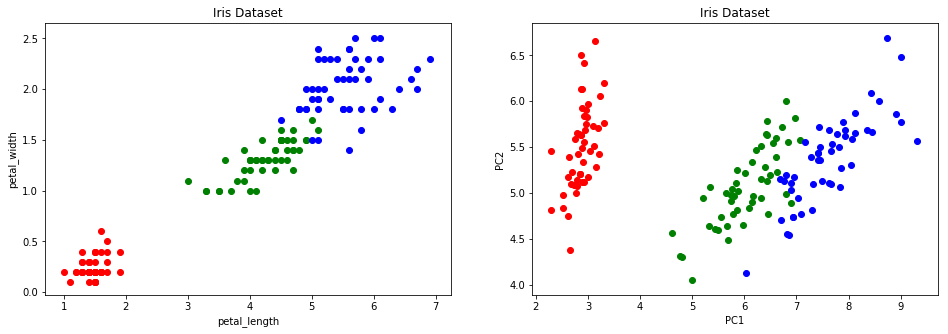

In [35]:
# Scatter Plot

fig, axes = plt.subplots(1,2,figsize=(16,5)) # subplots로 행=1, 열=2의 빈 그래프를 생성하여, fig와 axes로 반환한다
colors = {'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'} # 품종 마다 Marker의 색을 다르게 하기 위해 dictionary 데이터 생성

for i in range(len(iris)):
    axes[0].scatter(iris['petal_length'][i], iris['petal_width'][i], color=colors[iris['species'][i]])
    axes[1].scatter(iris['PC1'][i], iris['PC2'][i], color=colors[iris['species'][i]])
    
axes[0].set_title('Iris Dataset')
axes[0].set_xlabel('petal_length')
axes[0].set_ylabel('petal_width')
axes[1].set_title('Iris Dataset')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')